In [485]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import figure

class CorrelatedPatterns():
    def __init__(self, L, p, k, gamma):
        self.L = L
        self.p = p
        self.k = k
        self.gamma = gamma
        
        self.ancestors = []
        self.descendants = []
        self.differences = []
        
        
        for _ancestorIndex in range(p):
            ancestor = []
            for _i in range(L):
                ancestor.append(1 if random.uniform(0,1) < 0.5 else 0)
            self.ancestors.append(np.array(ancestor))
            
            self.descendants.append([])
            for _descendantIndex in range(k):
                descendant = []
                for __i in range(len(ancestor)):
                    if(random.uniform(0,1) < 1-gamma):
                        descendant.append(0 if random.uniform(0,1) < 0.5 else 1)
                    else:
                        descendant.append(ancestor[__i])
                self.descendants[_ancestorIndex].append(np.array(descendant))
            
            self.differences.append([])
            for _descendantIndex in range(k):
                self.differences[_ancestorIndex].append(self.ancestors[_ancestorIndex] - self.descendants[_ancestorIndex][_descendantIndex])
    
    def plot(self):
       
        fig, ax = plt.subplots(nrows=len(self.ancestors), ncols=2, figsize=(self.L,2.5*self.p))
        #fig.suptitle(f"Gamma = {self.gamma}")
        cmap = colors.ListedColormap(['blue', 'white', 'red'])
        bounds = [-1,0,1,2]
        norm = colors.BoundaryNorm(bounds, cmap.N)
        
        for _a in range(len(self.ancestors)):
            ax[_a][0].title.set_text(f'Ancestor {_a+1}(in the first row) and its descendants')
            ax[_a][0].imshow([self.ancestors[_a]] + self.descendants[_a], cmap=cmap, norm=norm)

            ax[_a][0].grid(which='major', axis='both', linewidth=2, color='black')
            ax[_a][0].set_xticks(np.arange(-0.5,len(self.differences[0][0]),1))
            ax[_a][0].set_yticks(np.arange(-0.5,len(self.differences[0])+1,1))
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False,
                labeltop=False) # labels 


            ax[_a][0].yaxis.set_ticklabels([])
            ax[_a][0].xaxis.set_ticklabels([])
            
        for _a in range(len(self.ancestors)):
            ax[_a][1].title.set_text(f'Difference between ancestor {_a+1} and its descendants')
            ax[_a][1].imshow([[0 for i in range(self.L)]] + self.differences[_a], cmap=cmap, norm=norm)

            ax[_a][1].grid(which='major', axis='both', linewidth=2, color='black')
            ax[_a][1].set_xticks(np.arange(-0.5,len(self.differences[0][0]),1))
            ax[_a][1].set_yticks(np.arange(-0.5,len(self.differences[0]),1))
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False,
                labeltop=False) # labels 


            ax[_a][1].yaxis.set_ticklabels([])
            ax[_a][1].xaxis.set_ticklabels([])

        plt.savefig('test.png', bbox_inches='tight')
        plt.show()


In [494]:
c = CorrelatedPatterns(L=500,
                       p=3,
                       k=4,
                       gamma=0.90)

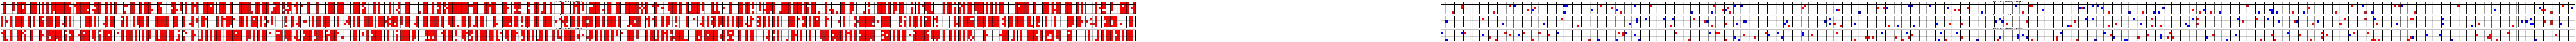

In [495]:
c.plot()